### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [3]:
dataset=pd.read_csv('Bengaluru_House_Data.csv')
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.shape

(13320, 9)

In [5]:
dataset.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### Getting the count of area type in the datase

In [7]:
dataset['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
dataset['area_type'].nunique()

4

#### Dropping unnecessary columns

In [9]:
dataset.drop(['area_type','society','balcony','availability'],axis='columns',inplace=True)
print(dataset.shape)

(13320, 5)


In [10]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

In [11]:
dataset.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
dataset.shape

(13320, 5)

#### since the dataset is large enough and the NULL values are less compared to total number of rows hence we drop the NULL Values

In [13]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())
print(dataset.shape)
#Now our dataset is free from NULL values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64
(13246, 5)


## Feature Engineering

exploring 'size' column

In [14]:
dataset['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Adding new column 'bhk'

In [15]:
# Here i am spliting the string into two parts and converting the first part into an integer
dataset['bhk'] = dataset['size'].apply(lambda x: int(x.split(' ')[0]))
dataset['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
dataset.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


## Exploring 'total_sqft' column

In [17]:
print(dataset['total_sqft'].unique())
# I found that some values are in  range type, so i need to convert it into a single number

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


#### defining a function to check whether the function can convert a value into float or not

In [18]:
def is_float(x):   #try and except works in such a way that when try block executes the function returns True
    try:
        float(x)
    except:
        return False
    return True

#testing the function
print(is_float(x='1056'))
print(is_float(x='1133 - 1384'))

True
False


In [19]:
dataset[~dataset['total_sqft'].apply(is_float)].head(10)
#Applying the function to the dataset and printing all the range type values 
#present in 'total_sqft' column

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### The above observations shows that total_sqft column can be a range (e.g. 2100-2850). For such case we can just take average of min and max value of the range. There are  other cases such as 34.46Sq. Meter and 4125Perch . I am going to simply drop such  cases

### defining a function to convert the range type values of 'total_sqft' column to a single value

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')         
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

# testing the function
print(convert_sqft_to_num('8000'))
print(convert_sqft_to_num('2100 - 2850'))
print(convert_sqft_to_num('34.46Sq. Meter'))

8000.0
2475.0
None


## applying this function to the dataset

In [21]:
dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)

In [22]:
dataset.head(10)
# now all the values of 'total_sqft' are float

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [23]:
dataset.iloc[30] 
# For the 30th index the 'total_sqft' is 2475.0 which is an average of the range 2100-2850

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering

### creating new column 'price_per_sqft' as we know in real estate market, price per sqft matters a lot

In [24]:
dataset['price_per_sqft'] = dataset['price']*100000/dataset['total_sqft']
dataset.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Exploring 'location' column

#### analysing locations column which is a categorical variable

In [25]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
dataset['location'].nunique()

1304

### creating  a variable location_stats to get location with total count or occurance

In [27]:
location_stats = dataset['location'].value_counts(ascending=False)
print(location_stats)

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64


In [28]:
print(len(location_stats))
print(len(location_stats[location_stats>10]))
print(len(location_stats[location_stats<=10]))

1304
241
1063


### creating a variable location_stats_less_than_10 to get the location with occurance <=10

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10)

location
Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: count, Length: 1063, dtype: int64


## Dimensionality Reduction

### redefining the 'location' column as '"other" value where location count is <= 10

In [30]:
dataset['location']=dataset['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print(len(dataset['location'].unique()))

242


In [31]:
dataset.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier detection and removal

### checking the 'total_sqft'/'bhk' column, if it is very less than there are some error and we have to remove these outliers

In [32]:
dataset[dataset['total_sqft'] / dataset['bhk'] < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


#### In real estate, normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft).But above data points shows 6 bhk apartment with 1020 sqft and 8 bhk apartment with 600 sqft which can be removed as an outlier

In [33]:
print(dataset.shape)

(13246, 7)


In [34]:
dataset = dataset[~(dataset['total_sqft'] / dataset['bhk'] < 300)]
print(dataset.shape)

(12502, 7)


# describing the 'price_per_sqft' column

In [35]:
print(dataset['price_per_sqft'].describe())
#Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


#### Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft. But the 'price_per_sqft' should not very low or high

### defining a function to remove these extreme cases of very high or low values of 'price_per_sqft' based on std()

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - std)) & (subdf['price_per_sqft'] <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

    
#key will represent each unique location value during each iteration of the loop.
#pd.concat function concatenates (combines) two DataFrames vertically (along rows)
#ignore_index=True parameter ensures that the resulting DataFrame (df_out) has a new, continuous index

In [37]:
dataset = remove_pps_outliers(dataset)
print(dataset.shape)

(10244, 7)


### plotting graph where we can visualize that for the same location and same 'total_sqft',the price of 3 bhk properties is less than 2 bhk properties

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area',color='r',size=15)
    plt.ylabel('Price',color='r',size=15)
    plt.title(location,color='g',size=20)
    plt.legend()
    plt.show()

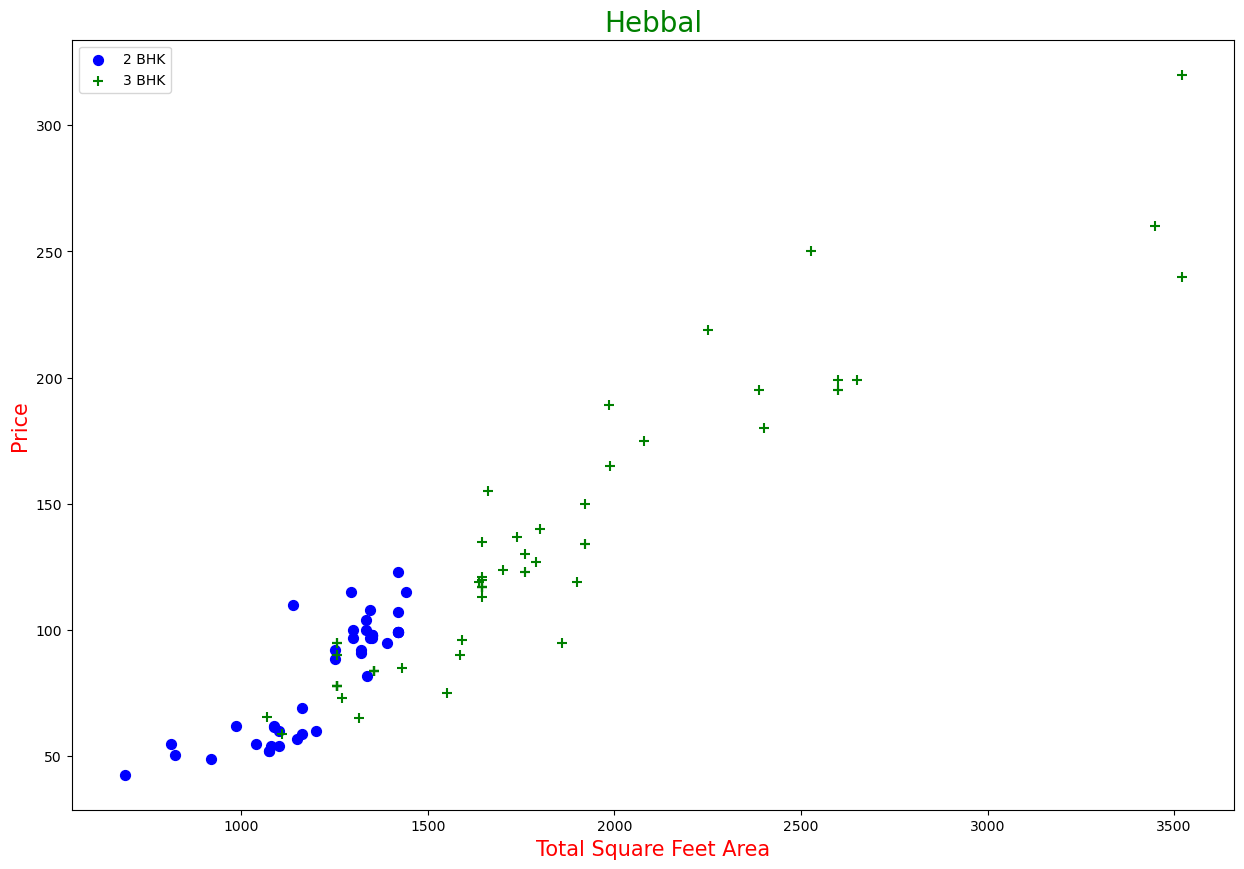

In [39]:
plot_scatter_chart(dataset,"Hebbal")

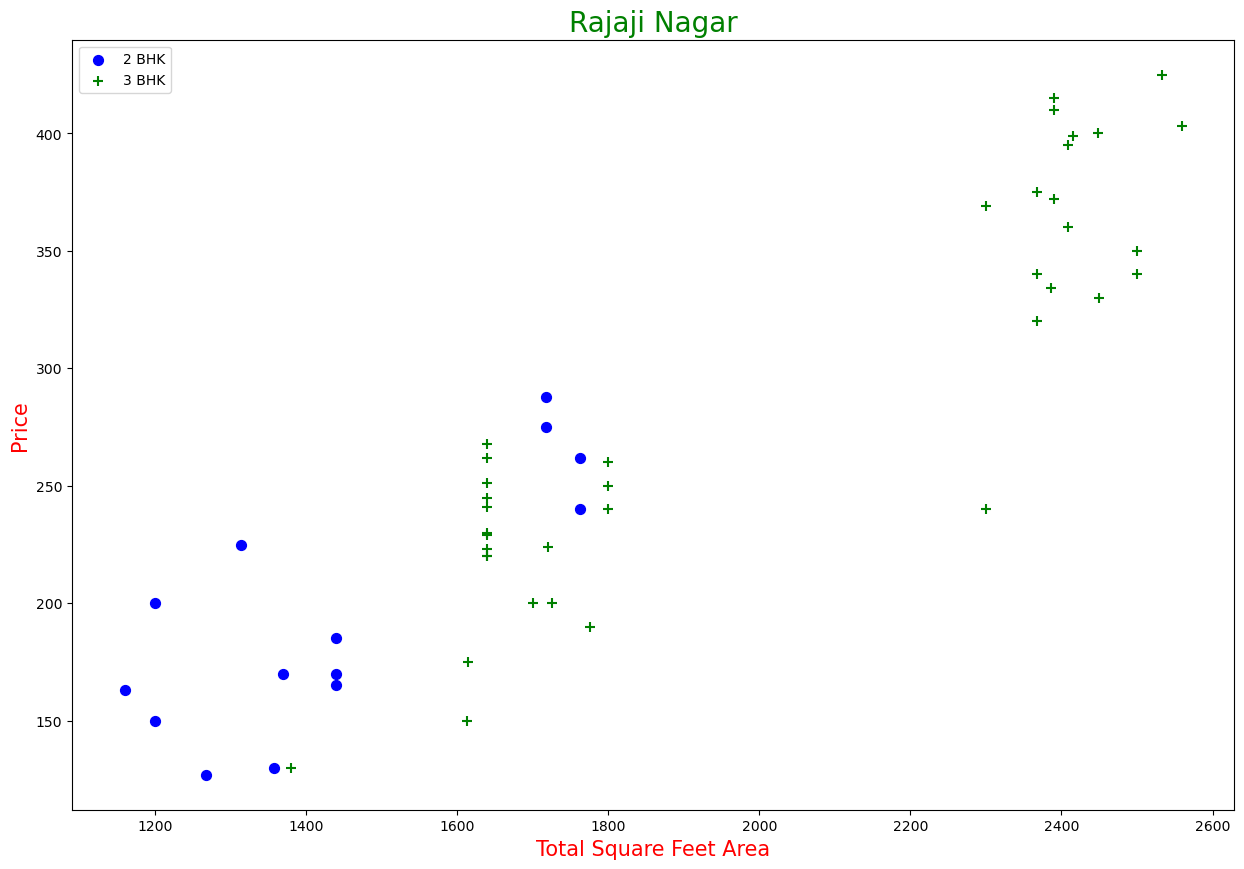

In [40]:
plot_scatter_chart(dataset,"Rajaji Nagar")

### defining a funcion where we can get the rows with same location ,but the property with  less 'bhk' having more price than the property which have more 'bhk' and less price

#### Now we can remove those more BHK apartments whose price_per_sqft is less than mean price_per_sqft of small BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])#creating an empty numpy array to store indices of rows that will be excluded (outliers).
    for location, location_df in df.groupby('location'):
        bhk_stats = {}              # creating an empty dictionary  to store statistics for each BHK configuration
        for bhk, bhk_df in location_df.groupby('bhk'): 
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5: 
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

dataset = remove_bhk_outliers(dataset)
print(dataset.shape)

#stats['count']>5  ensures that there should be sufficient data points for statistical validity
# bhk: Represents the current BHK configuration (e.g., 1 BHK, 2 BHK, etc.)
#bhk_df:Represent subset DataFrame containing rows only for the current BHK configuration within the current location_df
#bhk_stats.get(bhk-1) retrieves the statistics dictionary for the previous BHK configuration

(7342, 7)


### Ploting same scatter chart again

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area',color='r',size=15)
    plt.ylabel('Price',color='r',size=15)
    plt.title(location,color='g',size=20)
    plt.legend()
    plt.show()

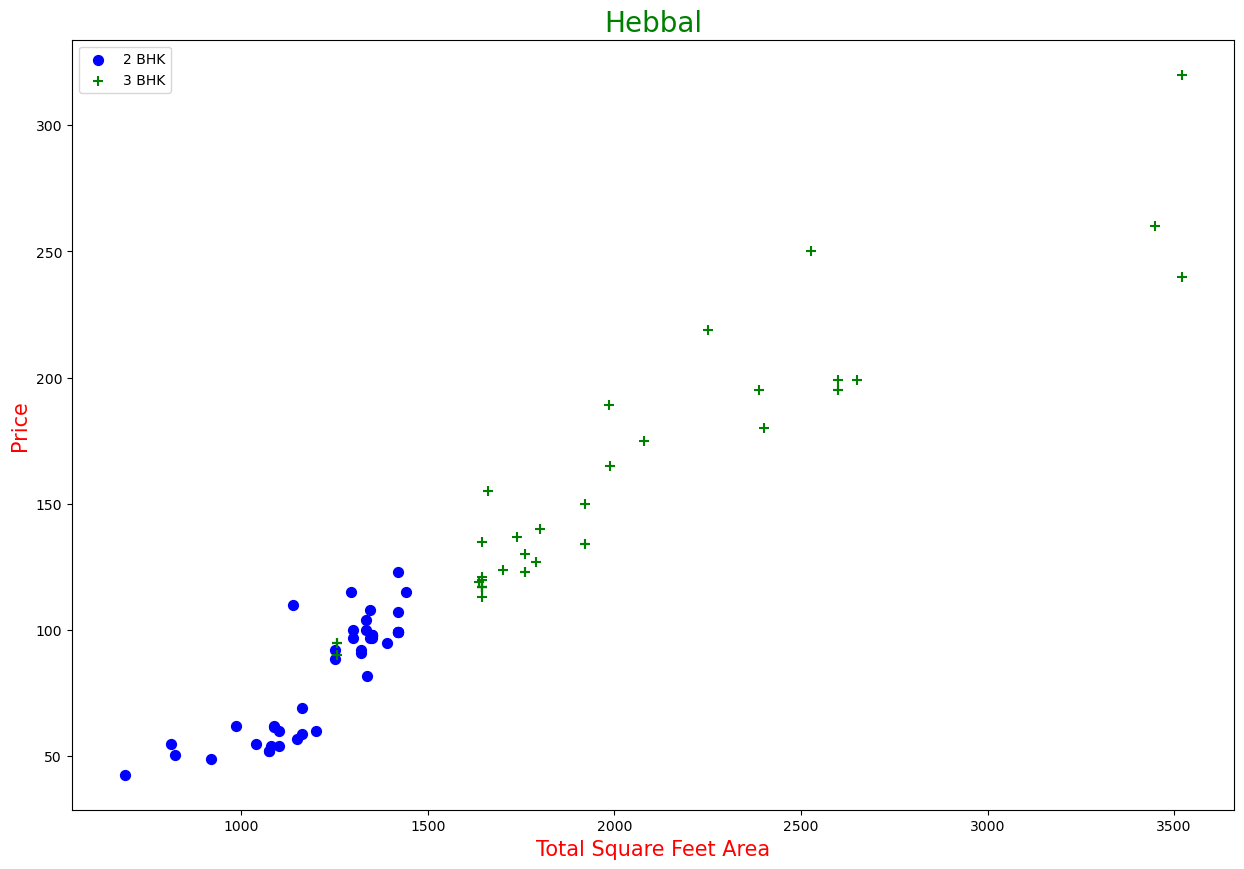

In [43]:
plot_scatter_chart(dataset,"Hebbal")

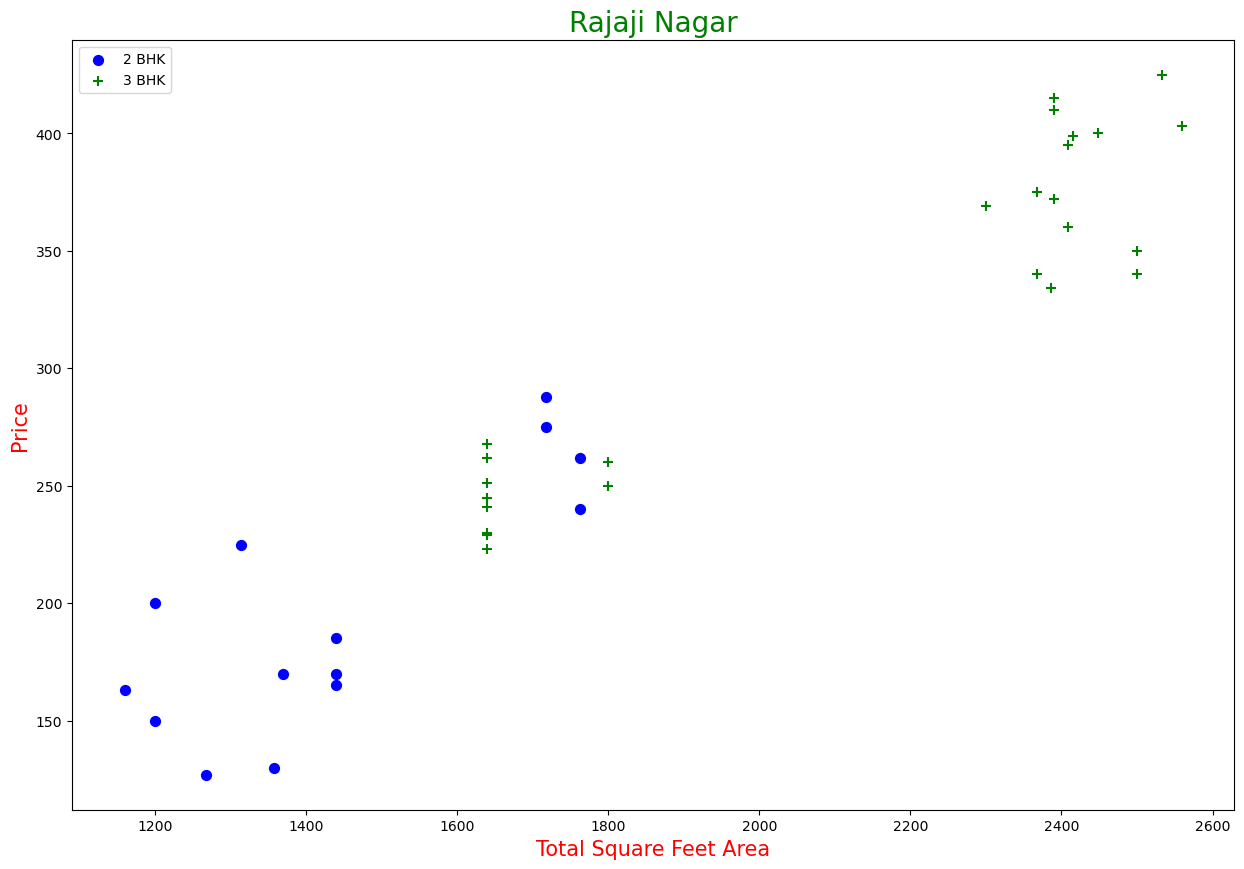

In [44]:
plot_scatter_chart(dataset,"Rajaji Nagar")

# histogram for properties per sqaure feet area

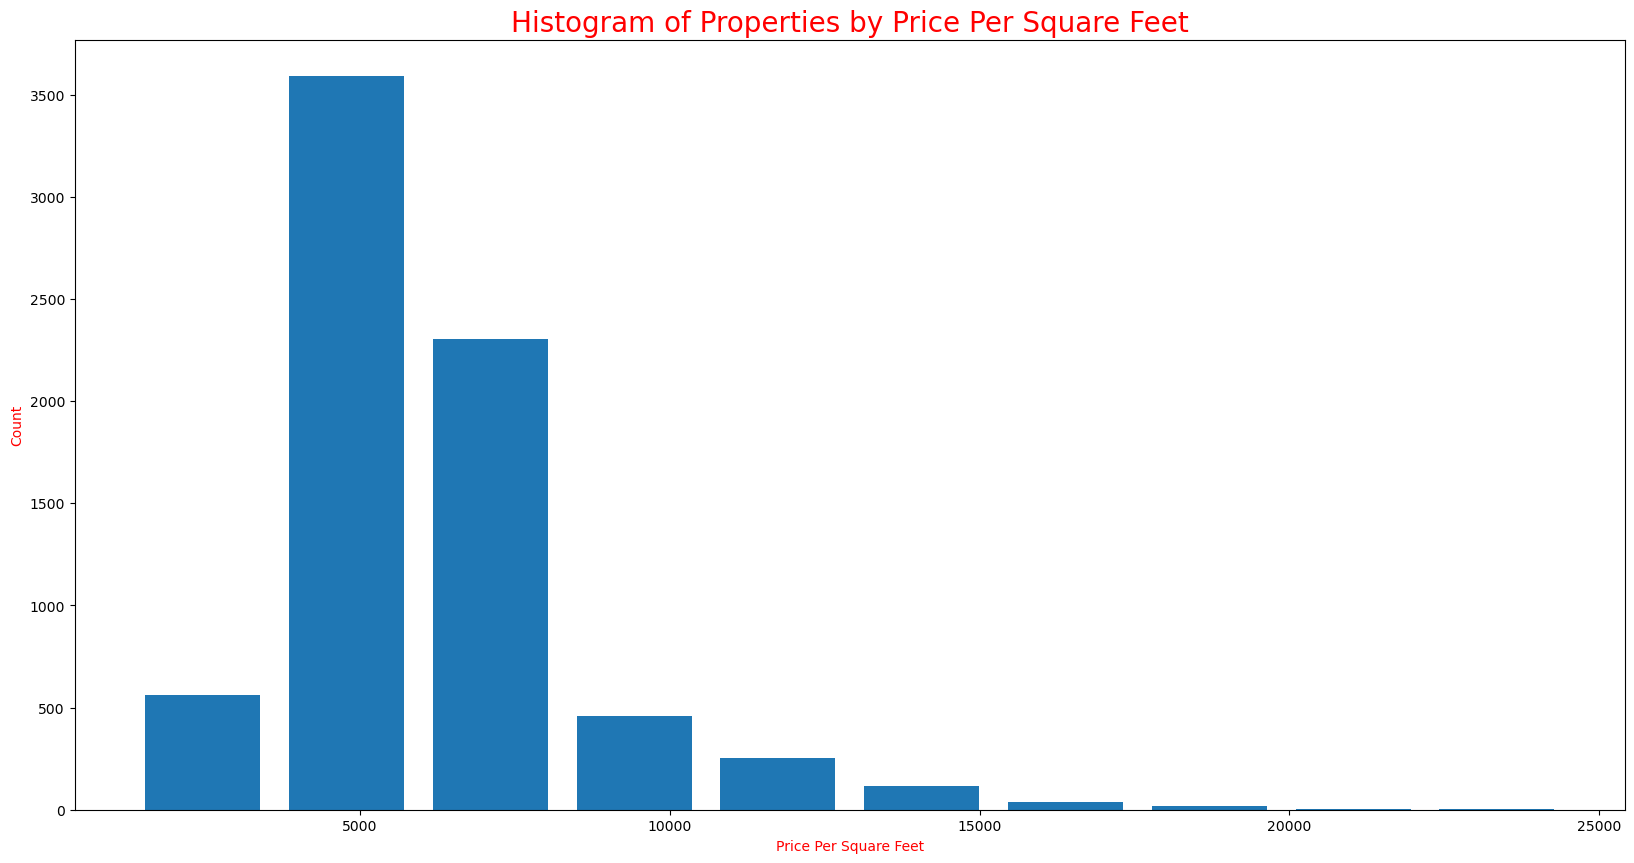

In [45]:
plt.figure(figsize=(20,10))
plt.hist(dataset['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price Per Square Feet',color='r')
plt.ylabel('Count',color='r')
plt.title('Histogram of Properties by Price Per Square Feet',color='r',size=20)
plt.show()

#rwidth is the width of the bars

# exploring 'bathroom' feature

In [46]:
print(dataset['bath'].unique())

[ 2.  3.  4.  5.  8.  1.  6.  7.  9. 12. 16. 13.]


### having 10 bedrooms and bathroom > 10 is unusual 

In [47]:
dataset[dataset['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


### plotting histogram of bathroom

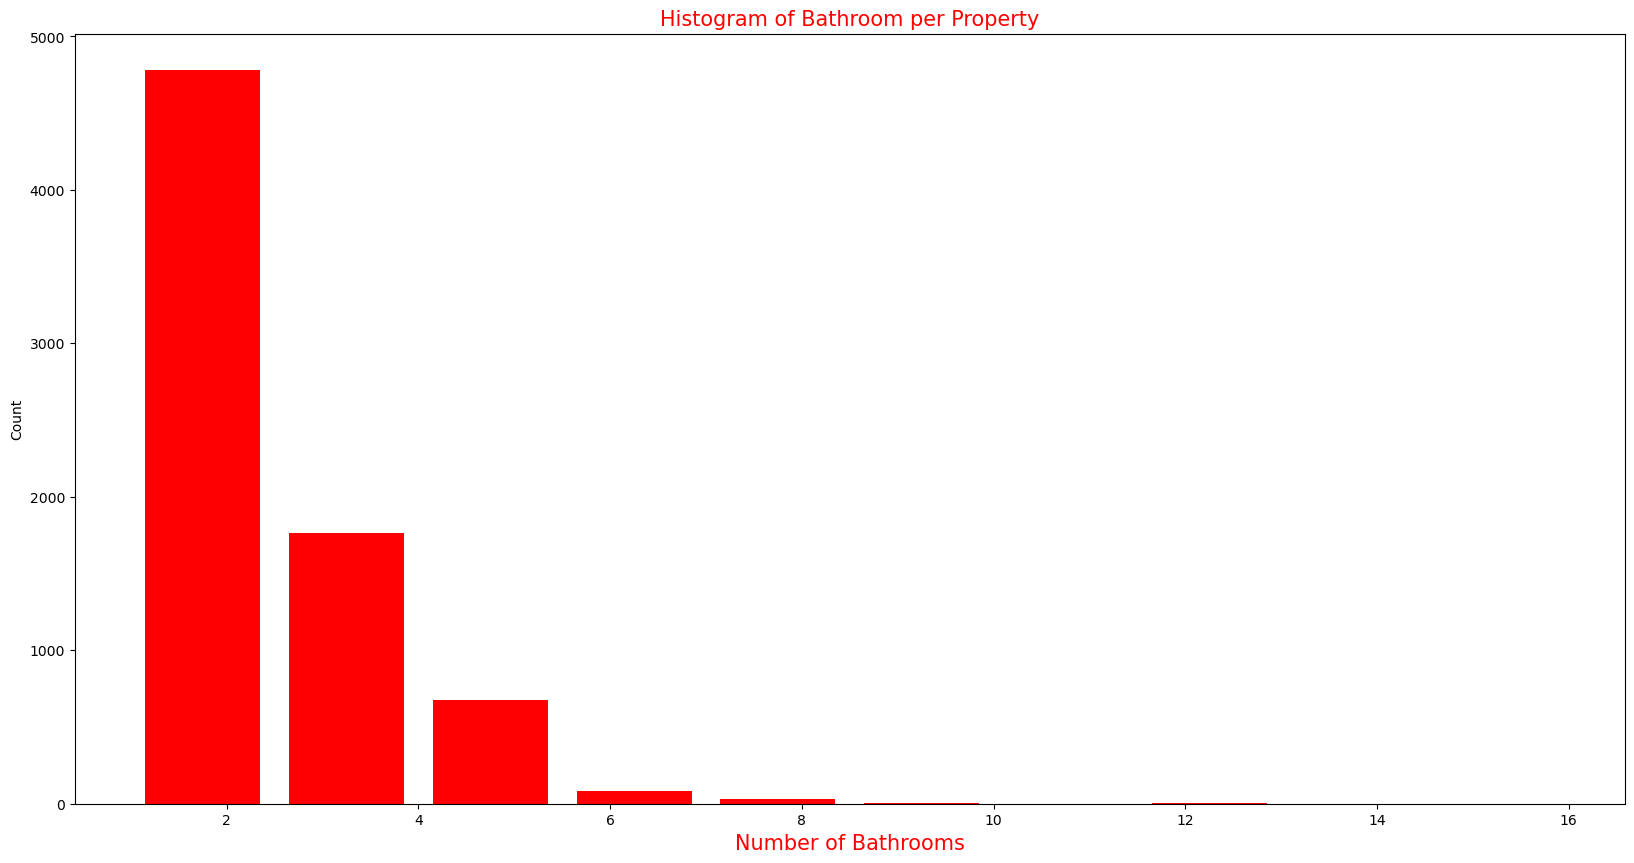

In [48]:
plt.figure(figsize=(20,10))
plt.hist(dataset['bath'], rwidth=0.8, color='red')
plt.xlabel('Number of Bathrooms',color='r',size=15)
plt.ylabel('Count')
plt.title('Histogram of Bathroom per Property',color='r',size=15)
plt.show()

In [49]:
print(dataset.shape)
dataset[dataset['bath']> dataset['bhk']+2]

(7342, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home,so we will remove those outliers

In [50]:
dataset=dataset[dataset['bath']< dataset['bhk']+2]
print(dataset.shape)

(7264, 7)


## after removing outliers, dropping unwanted features

In [51]:
dataset.drop(['size','price_per_sqft'], axis='columns', inplace=True)
dataset.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


## converting 'location' column into numeric values , as Machine Learning models deals with numbers only

In [52]:
dummies = pd.get_dummies(dataset['location'])
dummies=dummies.astype(int)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
dataset = pd.concat([dataset,dummies.drop('other', axis='columns')], axis='columns')
dataset.drop('location',axis=1,inplace=True)
dataset.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## distributing independent features in 'X' and dependent feature in 'y'

In [54]:
x=dataset.drop(['price'],axis=1)
y = dataset['price']

In [55]:
x.loc[10:14]

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10,1116.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,991.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,2850.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1630.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [57]:
print(x.shape)
print(y.shape)

(7264, 244)
(7264,)


### splitting the dataset into training set and test set

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

### training the model

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

print(model.score(x_test,y_test))

0.7696224927820908


### Using K Fold cross validation to measure accuracy of the LinearRegression model

In [60]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)

cross_val_score(model,x,y,cv=cv)

#cross_val_score computes the cross-validation scores for the LinearRegression model
#The ShuffleSplit function splits my dataset into training and testing  in a random manner,keeping 20% data for testing
#cv parameter specifies the number of folds

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

#### I can see that in 5 iterations , i get a score above 80% all the time

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [62]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.845847,{'fit_intercept': False}
1,lasso,0.709560,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697331,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### so after running grid search,I found that linear regression model is giving the best score, hence i will use linear regression model 

In [63]:
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(x,y)

In [64]:
x.loc[18:22]

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
18,2750.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,2450.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,1875.0,3.0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,1500.0,5.0,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### evaluating the model

In [69]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if loc_index >= 0:
        arr[loc_index] = 1
    return model.predict([arr])[0]

In [70]:
loc_index = np.where(x.columns == '1st Block Jayanagar')[0][0]
loc_index

4

In [71]:
arr = np.zeros(len(x.columns))
arr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
print(predict_price('1st Phase JP Nagar',1000,2,2))
print(predict_price('1st Phase JP Nagar',1000,3,3))
print(predict_price('Indira Nagar',1000,3,3))

88.92571492028968
89.3722710019381
188.12499388023934


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
location = input('Enter the location : ')
sqft = int(input('Enter the square_feet  : '))
bath = int(input('Enter the number of bathromms  : '))
bhk = int(input('Enter BHK : '))

print('\33[1m' "The price of the property is: Rs",predict_price(location,sqft,bath,bhk))

Enter the location : 1st Phase JP Nagar
Enter the square_feet  : 1000
Enter the number of bathromms  : 2
Enter BHK : 2
The price of the property is: Rs 88.92571492028968


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# THE END